In [26]:
import pandas as pd
#%pip install matplotlib-venn
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# Import data and dataproject functions
from dataproject2 import Dataproject_functions

# Initialize DataProject object
dp = Dataproject_functions('Data/BIO5.xlsx')

In [31]:
# Load data
dp.load_data()

# Clean data
dp.clean_data()

# Melt data
dp.melt_data()

dp.bio_melted.head(10)
for column in dp.bio_melted.columns:
    print(f"Unique values for column {column}:")
    print(dp.bio_melted[column].unique()) 
    print()



Unique values for column Country:
['Denmark' 'EU-28 excluding Denmark' 'USA']

Unique values for column Censorship:
['All censorship conditions' 'Allowed for all'
 'Discouraged for children under 7 years'
 'Allowed for children over 11 years' 'Allowed for children over 15 years'
 'Over 15 years, not censored']

Unique values for column Type:
['Tickets sold (thousands)' 'Movies (number)']

Unique values for column Cinema_movies:
['Feature films and documentaries, all target groups'
 'Feature films, all target groups' 'Feature films, adults'
 'Feature films, children/young/family'
 'Documentary films, all target groups' 'Documentary films, adults'
 'Documentary films, children/young/family' 'Not specified' nan]

Unique values for column Year:
[2015 2016 2017 2018 2019 2020 2021 2022 2023]

Unique values for column Value:
[3.710e+03 3.690e+03 2.443e+03 1.247e+03 2.000e+01 0.000e+00 3.500e+01
 2.700e+01 7.000e+00 8.000e+00 1.833e+03 1.831e+03 8.020e+02 1.029e+03
 2.000e+00 1.300e+01 1.100e

In [21]:
# Filter data
selected_countries = ['Denmark', 'USA', 'EU-28 excluding Denmark']
selected_censorship = 'All censorship conditions'
selected_type = ['Movies (number)', 'Tickets sold (thousands)']
selected_cinema_movies = 'Feature films and documentaries, all target groups'

dp.filter_data(selected_countries, selected_censorship, selected_type, selected_cinema_movies)
dp.group_data()

# Print summary statistics
dp.print_summary_stats()

Summary Statistics:


count         mean  \
Country                 Type                                           
Denmark                 Movies (number)             9.0    30.888889   
                        Tickets sold (thousands)    9.0  2905.000000   
EU-28 excluding Denmark Movies (number)             9.0    69.222222   
                        Tickets sold (thousands)    9.0  1321.888889   
USA                     Movies (number)             9.0    86.888889   
                        Tickets sold (thousands)    9.0  5391.222222   

                                                          std     min     25%  \
Country                 Type                                                    
Denmark                 Movies (number)              6.900081    18.0    27.0   
                        Tickets sold (thousands)   514.184549  2464.0  2470.0   
EU-28 excluding Denmark Movies (number)             15.982629    38.0    66.0   
                        Tickets sold (thousands)   551.041615   514.0   887.0   
USA                     Movies (number)             16.533636    51.0    82.0   
                        Tickets sold (thousands)  1992.956145  1966.0  5010.0   

                                                     50%     75%     max  
Country                 Type                                              
Denmark                 Movies (number)             34.0    36.0    37.0  
                        Tickets sold (thousands)  2611.0  3476.0  3710.0  
EU-28 excluding Denmark Movies (number)             70.0    80.0    91.0  
                        Tickets sold (thousands)  1289.0  1558.0  2360.0  
USA                     Movies (number)             87.0    93.0   107.0  
                        Tickets sold (thousands)  6026.0  6826.0  7396.0

In [32]:
# Filter and group censorship data
selected_countries_censorship = ['Denmark', 'USA', 'EU-28 excluding Denmark']
selected_censorship_censorship = ['Allowed for all', 'Discouraged for children under 7 years', 'Allowed for children over 15 years']
selected_type_censorship = ['Movies (number)']
selected_cinema_movies_censorship = 'Feature films and documentaries, all target groups'

dp.filter_and_group_data_censorship(selected_countries_censorship, selected_censorship_censorship, selected_type_censorship)
dp.compute_summary_stats_censorship()
dp.print_summary_stats_censorship()

Summary Statistics (Censorship):


count  \
Country                 Censorship                                      
Denmark                 Allowed for all                          72.0   
                        Allowed for children over 15 years       72.0   
                        Discouraged for children under 7 years   72.0   
EU-28 excluding Denmark Allowed for all                          72.0   
                        Allowed for children over 15 years       72.0   
                        Discouraged for children under 7 years   72.0   
USA                     Allowed for all                          72.0   
                        Allowed for children over 15 years       72.0   
                        Discouraged for children under 7 years   72.0   

                                                                    mean  \
Country                 Censorship                                         
Denmark                 Allowed for all                         4.291667   
                        Allowed for children over 15 years      3.208333   
                        Discouraged for children under 7 years  2.583333   
EU-28 excluding Denmark Allowed for all                         9.333333   
                        Allowed for children over 15 years      5.208333   
                        Discouraged for children under 7 years  5.708333   
USA                     Allowed for all                         9.333333   
                        Allowed for children over 15 years      9.236111   
                        Discouraged for children under 7 years  6.375000   

                                                                      std  \
Country                 Censorship                                          
Denmark                 Allowed for all                          4.348992   
                        Allowed for children over 15 years       4.205756   
                        Discouraged for children under 7 years   2.856916   
EU-28 excluding Denmark Allowed for all                          9.964727   
                        Allowed for children over 15 years       6.852444   
                        Discouraged for children under 7 years   6.576607   
USA                     Allowed for all                         10.191131   
                        Allowed for children over 15 years      12.214622   
                        Discouraged for children under 7 years   7.274183   

                                                                min   25%  \
Country                 Censorship                                          
Denmark                 Allowed for all                         0.0  0.75   
                        Allowed for children over 15 years      0.0  0.00   
                        Discouraged for children under 7 years  0.0  0.00   
EU-28 excluding Denmark Allowed for all                         0.0  0.00   
                        Allowed for children over 15 years      0.0  0.00   
                        Discouraged for children under 7 years  0.0  0.00   
USA                     Allowed for all                         0.0  0.00   
                        Allowed for children over 15 years      0.0  0.00   
                        Discouraged for children under 7 years  0.0  0.00   

                                                                50%    75%  \
Country                 Censorship                                           
Denmark                 Allowed for all                         3.0   7.00   
                        Allowed for children over 15 years      1.0   8.00   
                        Discouraged for children under 7 years  2.0   4.00   
EU-28 excluding Denmark Allowed for all                         5.0  18.00   
                        Allowed for children over 15 years      1.0   9.25   
                        Discouraged for children under 7 years  2.0  10.50   
USA                     Allowed for all                         3.5  18.00   
                        A

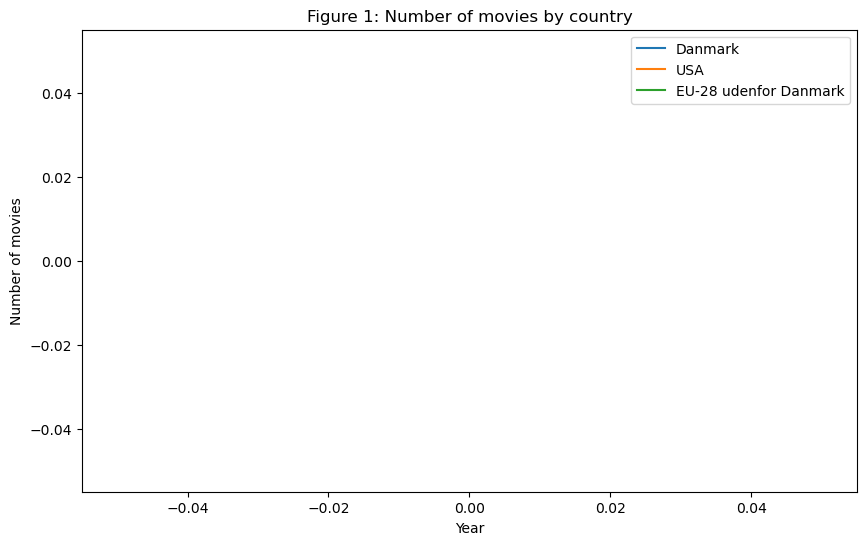

In [23]:
# Plot movies by country
dp.plot_movies_by_country_combined()